In [2]:
%matplotlib inline

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix  
import warnings
warnings.filterwarnings('ignore')

## Face recognitions - AT&T Laboratories Cambridge

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). 

In [3]:
def read_images():
    path = 'orl_faces/'
    X = []
    y = []
    for i in range(40):
        for j in range(10):
            img = Image.open(os.path.join(path, 's' + str(i + 1), str(j + 1) + '.pgm'))
            X.append(np.asarray(img, dtype=np.uint8).flatten())
            y.append(i)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y

In [4]:
ny, nx = 112, 92

def ShowImage(img):
    fig = plt.imshow(img.reshape(ny,nx),interpolation='nearest',cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
    return fig

In [5]:
faces, target = read_images()

In [6]:
def PlotFaces(axis1, axis2, length, data):    
    plt.figure(figsize = (12,7))

    for i in range(length):
        plt.subplot(axis1, axis2, i + 1)
        ShowImage(data[i,:])
        
    plt.show()    

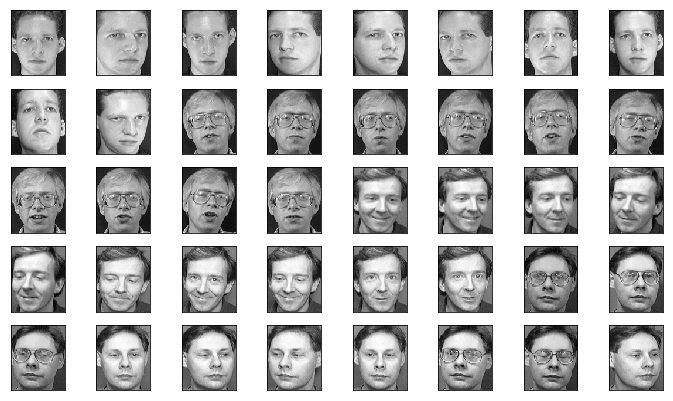

In [6]:
PlotFaces(5, 8, 40, faces)

## Show images of one person

Let's look in depth on a person's faces

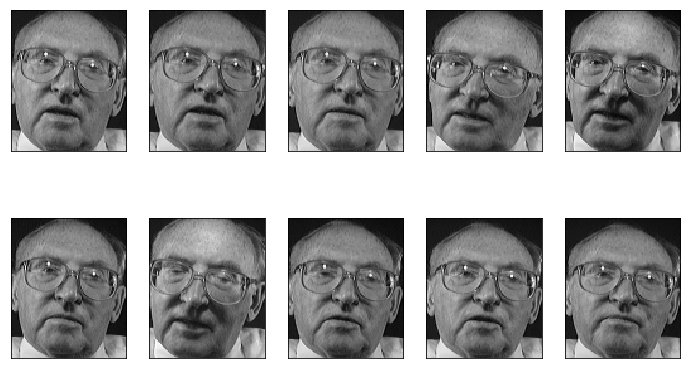

In [7]:
PlotFaces(2, 5, 10, faces[330:340])

## Average face

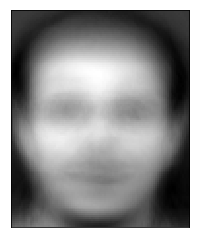

In [8]:
avgFace = np.mean(faces, axis = 0)

ShowImage(avgFace)
plt.show()

### Feature extraction using PCA

In [12]:
# Before using PCA, we have to normalize the data
norm = Normalizer()
X_norm = norm.fit_transform(faces)

# Now we'll use PCA
pca = PCA(.97, random_state=42)
X_pca = pca.fit_transform(X_norm)

print("Number of features before PCA: ", faces.shape[1])
print("Number of features after PCA: ", X_pca.shape[1])
print("We got to keep 97% of our data, and significally reduces the dimensions")

Number of features before PCA:  10304
Number of features after PCA:  252
We got to keep 97% of our data, and significally reduces the dimensions


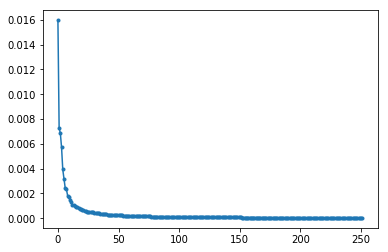

In [13]:
plt.plot(pca.explained_variance_, '.-')
plt.show()

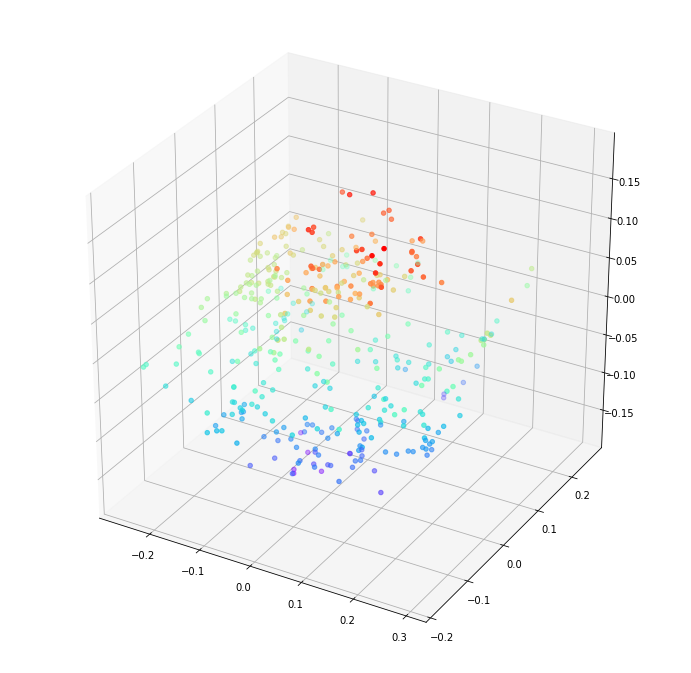

In [14]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(12,12))
plt.title('3D Visualization of eigenvectors')
ax = plt.axes(projection='3d')
xdata = X_pca[:, 0]
ydata = X_pca[:, 1]
zdata = X_pca[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.cm.rainbow);

## First 10 Eigenfaces

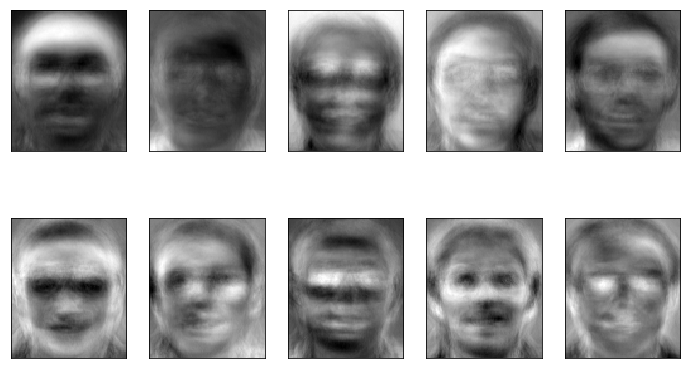

In [12]:
tenEigenVectors = X_pca[:,:10]
tenEigenVectors = np.dot(X_norm.T, tenEigenVectors)
PlotFaces(2, 5, 10, tenEigenVectors.T)    

## Classification

## People Classification
Now we will try using multi class SVM and Logistic Regreesion to classify the people.


### SVM

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size = 0.2, random_state = 42)

In [14]:
# Multi class svm 
linearSVMClassifier = OneVsRestClassifier(LinearSVC(C = 1000 ,random_state=42))
linearSVMClassifier.fit(X_train, y_train)
y_pred = linearSVMClassifier.predict(X_test)

In [15]:
# Cross Validation
all_accuracies = cross_val_score(estimator=linearSVMClassifier, X=X_train, y=y_train, cv=10)  
print(all_accuracies)

[0.975      1.         0.925      0.975      0.97435897 0.94871795
 1.         0.96296296 0.9375     1.        ]


In [16]:
print('Model: Linear SVM \n')
print('Hyperparameters: C = 1000\n')
print('Confusion Matrix: \n')
print(confusion_matrix(y_test,y_pred))  
print('\nClassification Report:\n')
print(classification_report(y_test,y_pred))  
print('Classification score:', linearSVMClassifier.score(X_test, y_test))
print("10-fold Cross Validation Score: ", np.mean(all_accuracies))

Model: Linear SVM 

Hyperparameters: C = 1000

Confusion Matrix: 

[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]

Classification Report:

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         4
          4       0.75      1.00      0.86         3
          5       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00   

### Logistic Regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size = 0.2, random_state = 42)

In [18]:
logisticRegressionClassifier = OneVsRestClassifier(LogisticRegression(C = 100))
logisticRegressionClassifier.fit(X_train, y_train)
y_pred = logisticRegressionClassifier.predict(X_test)

In [19]:
# Cross Validation
all_accuracies = cross_val_score(estimator=logisticRegressionClassifier, X=X_train, y=y_train, cv=10)  
print(all_accuracies)

[0.975      0.975      0.925      0.95       0.97435897 0.92307692
 1.         0.96296296 0.9375     1.        ]


In [20]:
print('Model: Logistic Regression \n')
print('Hyperparameters: C = 100\n')
print('Confusion Matrix: \n')
print(confusion_matrix(y_test,y_pred))  
print('\nClassification Report:\n')
print(classification_report(y_test,y_pred))  
print('Classification score:', logisticRegressionClassifier.score(X_test, y_test))
print("10-fold Cross Validation Score: ", np.mean(all_accuracies))

Model: Logistic Regression 

Hyperparameters: C = 100

Confusion Matrix: 

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]

Classification Report:

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         3
          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         4
          4       0.75      1.00      0.86         3
          5       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         1
         14       1.00      1.00     

We did a little better with SVM.

# Mirror Classification
Let's see if our classifier also works for mirror reflections of the faces.

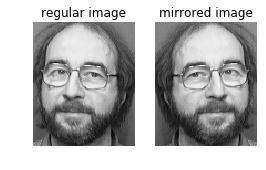

In [21]:
mirrorFaces = faces.copy()
for i in range(mirrorFaces.shape[0]):
    mirrorFaces[i,:] = np.fliplr(mirrorFaces[i,:].reshape(112,92)).reshape(10304)

    
plt.figure(figsize = (4,3))
plt.subplot(1, 2, 2)
plt.title('mirrored image')
plt.axis('off')
plt.imshow(mirrorFaces[272].reshape(112,92),cmap='gray')
plt.subplot(1, 2, 1)
plt.title('regular image')
plt.axis('off')
plt.imshow(faces[272].reshape(112,92),cmap='gray')

plt.show()

In [22]:
X_mirror_pca = pca.transform(mirrorFaces) # Reduce dimensions
y_mirror_pred = logisticRegressionClassifier.predict(X_mirror_pca) # Predict with our trained model

In [23]:
# Show results
print('Model: Logistic Regression \n')
print('Hyperparameters: C = 100\n')
print('Confusion Matrix: \n')
print(confusion_matrix(target, y_mirror_pred))  
print('\nClassification Report:\n')
print(classification_report(target, y_mirror_pred))  
print('Classification score:', logisticRegressionClassifier.score(X_mirror_pca, target))

Model: Logistic Regression 

Hyperparameters: C = 100

Confusion Matrix: 

[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:

             precision    recall  f1-score   support

          0       0.50      0.20      0.29        10
          1       0.00      0.00      0.00        10
          2       0.00      0.00      0.00        10
          3       0.44      0.80      0.57        10
          4       0.04      0.90      0.08        10
          5       0.25      0.20      0.22        10
          6       1.00      0.40      0.57        10
          7       0.00      0.00      0.00        10
          8       0.00      0.00      0.00        10
          9       0.00      0.00      0.00        10
         10       0.00      0.00      0.00        10
         11       0.00      0.00      0.00        10
         12       0.00      0.00      0.00        10
         13       0.00      0.00     



# Glasses classification
Let's try to classify whether someone is wearing glasses. 
Unlike classifying people, this is a binary problem.

In [7]:
def plotAllFaces(axis1, axis2, length, data):    
    plt.figure(figsize = (20,16))

    for i in range(0, 40):
        plt.subplot(axis1, axis2, i + 1)
        ShowImage(data[i*10+2,:])
        
    plt.show()    

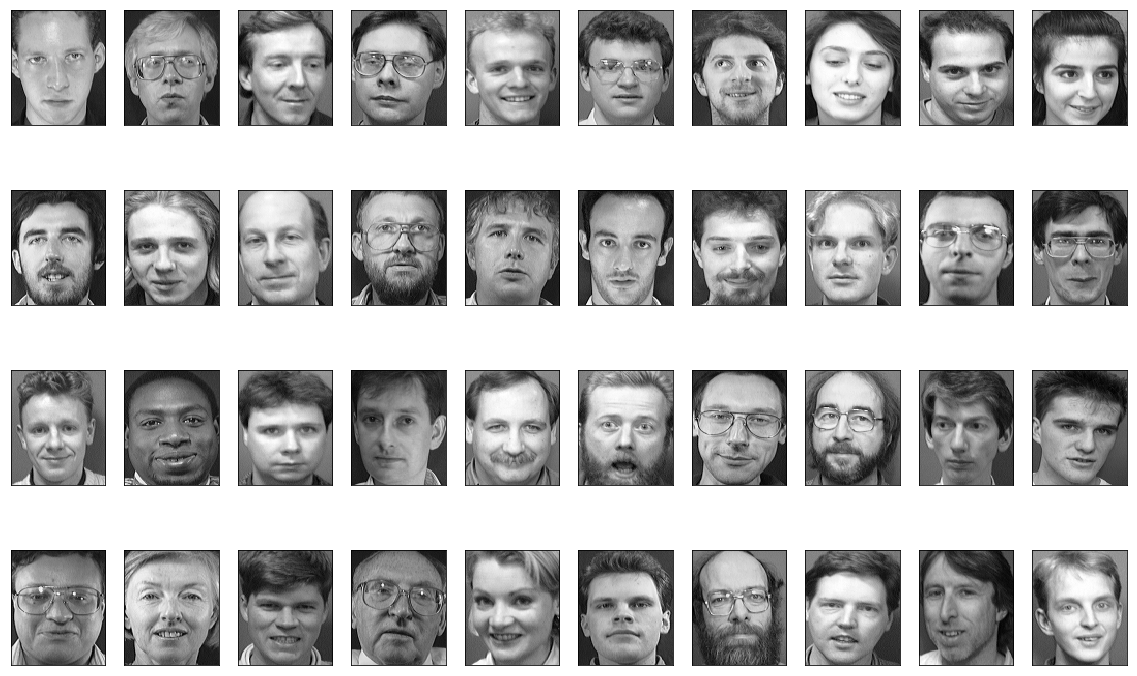

In [8]:
plotAllFaces(5, 10, 40, faces)

Now, we get the target vector.

In [15]:
target_glasses = np.zeros(target.shape)
# in the plot above, we can see which people wear glasses. We'll use that information.
has_glasses = [1, 3, 5, 12, 13, 16, 18, 19, 26, 27, 30, 33, 36]
for person in has_glasses:
    for i in range(10):
        target_glasses[person*10+i] = 1

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, target_glasses, test_size = 0.2, random_state = 42)

In [30]:
# apply SVM
clf = SVC(kernel='linear', C = 20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  

In [31]:
# Cross Validation
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)  
print(all_accuracies)

[0.96969697 0.87878788 0.8125     0.9375     0.9375     0.96875
 0.90625    0.90625    0.93548387 0.87096774]


In [32]:
print('Model: Linear SVM \n')
print('Confusion Matrix: \n')
print(confusion_matrix(y_test,y_pred))  
print('\nClassification Report:\n')
print(classification_report(y_test,y_pred))  
print('Classification score:', clf.score(X_test, y_test))
print("10-fold Cross Validation Score: ", np.mean(all_accuracies))

Model: Linear SVM 

Confusion Matrix: 

[[57  1]
 [ 4 18]]

Classification Report:

             precision    recall  f1-score   support

        0.0       0.93      0.98      0.96        58
        1.0       0.95      0.82      0.88        22

avg / total       0.94      0.94      0.94        80

Classification score: 0.9375
10-fold Cross Validation Score:  0.9123686461388074


Support Vectors:


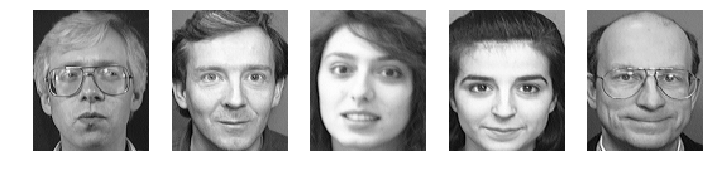

In [54]:
# Display 5 support vectors
print("Support Vectors:")
plt.figure(figsize = (12,8))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.axis('off')
    plt.imshow(faces[clf.support_][i*8-1].reshape(112,92),cmap='gray')
plt.show()